<div style="background-color:#173267;text-align:center;font-family:Arial;color:white;">
    <br>
    <img src="Files/logo-uc-01.svg" style="width:20%;margin:10px">
    <p style="font-size:40pt;font-weight:bold;text-align:center">
        AYUDANTÍA 8: Análisis Exploratorio
    </p>
    <p style="font-size:20pt;font-weight:bold;margin:20px;text-align:center">
        Introducción a la Ciencia de Datos
    </p>
    <p style="font-size:12pt;text-align:center">
        Felipe Gutiérrez - figutier@uc.cl
        Nicolas Mendicoa - nmendicoa@uc.cl
        <br>4 de Octubre de 2022
    </p>
    <p style="text-align:center;font-family:Trebuchet MS;color:white;font-size:12pt;">        
        Basado en notebook de:
        Vicente Agüero - vicenteaguero@uc.cl
        <br>
    </p>
    <br><br>
</div>

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Analisis exploratorio numerico

In [210]:
# Extraido de https://www.kaggle.com/datasets/julienjta/twitter-mentions-volumes
# Numero de veces que se menciona (cada 5 min) a una compañia grande en twitter
twitter = pd.read_csv('Files/Twitter/dataset.csv')
# fijemonos que timestamp son str
print(type(twitter['timestamp'][0]))
twitter.head()

<class 'str'>


,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [211]:
twitter.describe()
# podemos especificar percentiles con percentiles=[]

,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
count,15902.000000,15831.000000,15902.000000,15853.000000,15833.000000,15842.000000,15893.000000,15851.000000,15858.000000,15866.000000
mean,85.552320,53.298465,3.349327,0.359616,17.811280,20.736397,4.390235,11.397262,0.866566,5.456322
std,321.050721,30.553147,4.605324,1.093613,19.740055,18.564627,5.501389,24.804380,1.462004,21.574276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,36.000000,1.000000,0.000000,9.000000,11.000000,1.000000,5.000000,0.000000,0.000000
50%,47.000000,50.000000,2.000000,0.000000,14.000000,16.000000,3.000000,8.000000,0.000000,2.000000
75%,76.000000,65.000000,5.000000,0.000000,22.000000,26.000000,6.000000,13.000000,1.000000,4.000000
max,13479.000000,1673.000000,209.000000,50.000000,1258.000000,465.000000,139.000000,2241.000000,36.000000,231.000000


In [212]:
twitter.describe(percentiles=[0.1, 0.30, 0.70, 0.99])

,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
count,15902.000000,15831.000000,15902.000000,15853.000000,15833.000000,15842.000000,15893.000000,15851.000000,15858.000000,15866.000000
mean,85.552320,53.298465,3.349327,0.359616,17.811280,20.736397,4.390235,11.397262,0.866566,5.456322
std,321.050721,30.553147,4.605324,1.093613,19.740055,18.564627,5.501389,24.804380,1.462004,21.574276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,19.000000,26.000000,0.000000,0.000000,6.000000,7.000000,0.000000,3.000000,0.000000,0.000000
30%,32.000000,39.000000,1.000000,0.000000,10.000000,12.000000,2.000000,5.000000,0.000000,1.000000
50%,47.000000,50.000000,2.000000,0.000000,14.000000,16.000000,3.000000,8.000000,0.000000,2.000000
70%,68.000000,62.000000,4.000000,0.000000,20.000000,23.000000,5.000000,12.000000,1.000000,3.000000
99%,653.990000,135.000000,18.000000,4.000000,74.000000,86.000000,21.000000,68.000000,6.000000,156.350000
max,13479.000000,1673.000000,209.000000,50.000000,1258.000000,465.000000,139.000000,2241.000000,36.000000,231.000000


In [213]:
# Convertimos las fechas de str a pd.Timestamp
twitter["timestamp"] = pd.to_datetime(twitter["timestamp"])

# Entre que fechas estan los datos?
print(twitter["timestamp"].min(), twitter["timestamp"].max())

2015-02-26 21:42:53 2015-04-23 02:47:53


In [214]:
# Indexamos con el timestamp
twitter.set_index('timestamp', inplace=True)
twitter.head()

,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
timestamp,,,,,,,,,,
2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [99]:
twitter.corr()

,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
Apple,1.000000,0.063501,0.058566,0.012761,0.027515,0.035947,0.035861,0.008515,0.022286,0.008938
Amazon,0.063501,1.000000,0.229034,0.101721,0.177495,0.227251,0.178340,0.086577,0.158885,0.050513
Salesforce,0.058566,0.229034,1.000000,0.097179,0.208633,0.190812,0.186823,0.079558,0.154194,0.045477
CVS,0.012761,0.101721,0.097179,1.000000,0.082790,0.097286,0.084085,0.029986,0.085023,0.023171
Facebook,0.027515,0.177495,0.208633,0.082790,1.000000,0.233749,0.145611,0.059646,0.126313,0.009766
Google,0.035947,0.227251,0.190812,0.097286,0.233749,1.000000,0.219021,0.087700,0.207159,0.038179
IBM,0.035861,0.178340,0.186823,0.084085,0.145611,0.219021,1.000000,0.078381,0.191513,0.021079
Coca-Cola,0.008515,0.086577,0.079558,0.029986,0.059646,0.087700,0.078381,1.000000,0.052348,0.009342
Pfizer,0.022286,0.158885,0.154194,0.085023,0.126313,0.207159,0.191513,0.052348,1.000000,0.039533
UPS,0.008938,0.050513,0.045477,0.023171,0.009766,0.038179,0.021079,0.009342,0.039533,1.000000


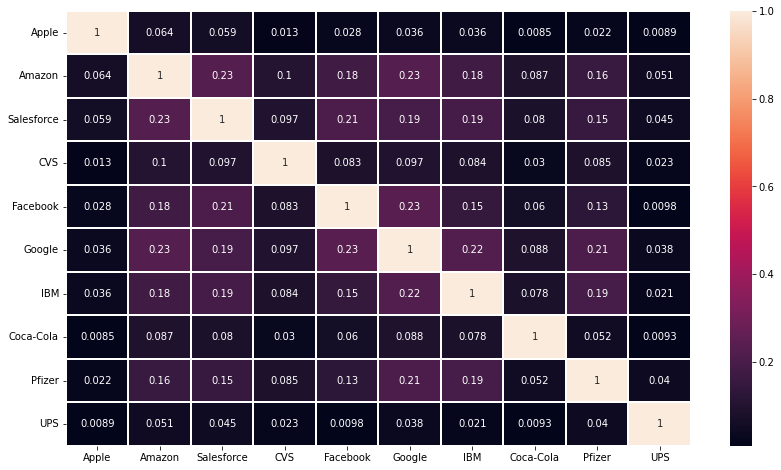

In [178]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(twitter.corr(), annot=True, linewidths=0.05, ax=ax)
plt.show()

# Analisis exploratorio grafico

<AxesSubplot:xlabel='timestamp'>

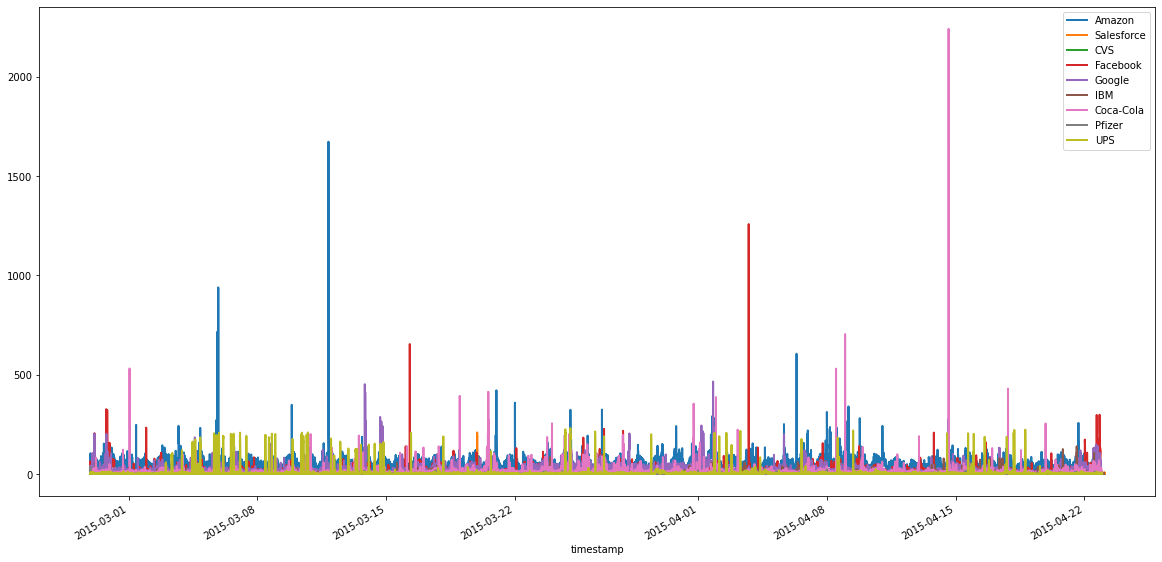

In [179]:
# El siguiente grafico no es muy claro, como podemos modificarlo para obtener info?
twitter.iloc[:,1:].plot(figsize=(20, 10), linewidth=2)

Wall time: 95.5 ms


<AxesSubplot:xlabel='timestamp'>

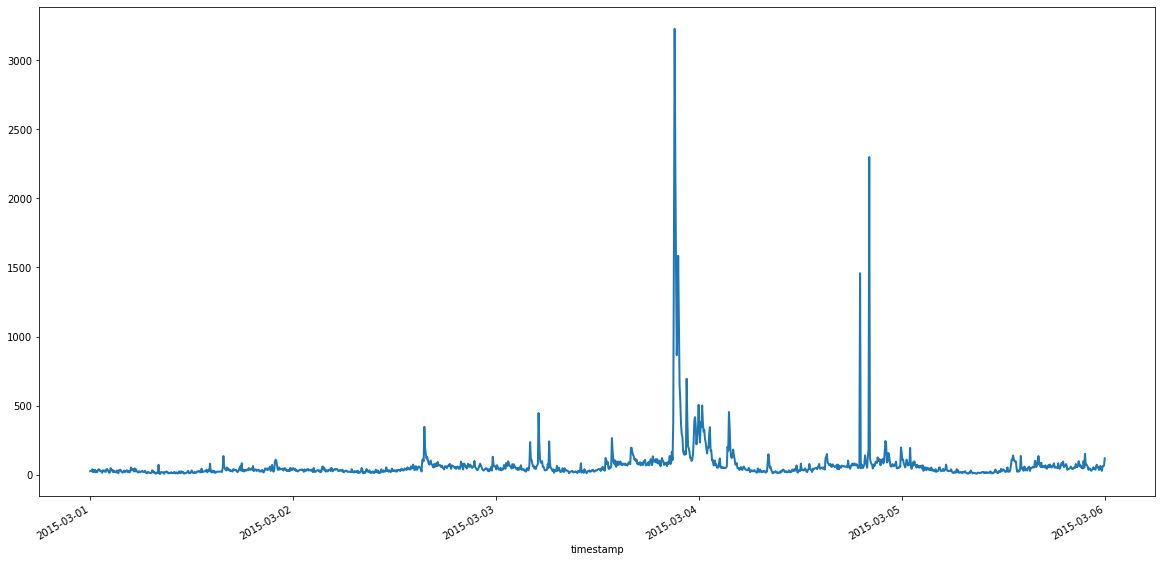

In [180]:
%%time
twitter["2015-03-01":"2015-03-05"]["Apple"].plot(figsize=(20, 10), linewidth=2)

Wall time: 100 ms


<AxesSubplot:xlabel='timestamp'>

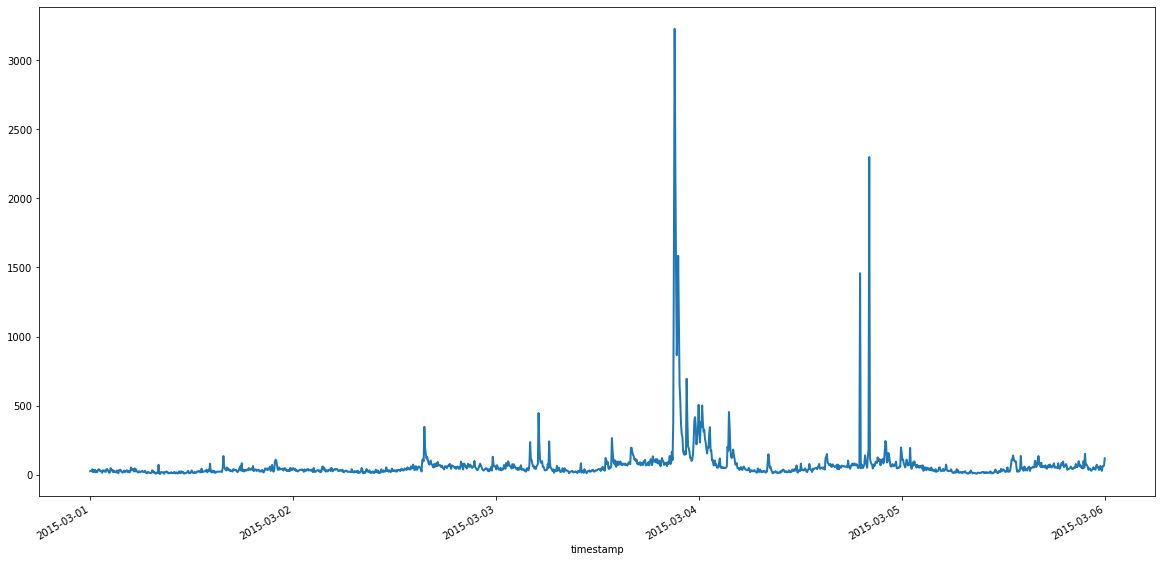

In [181]:
%%time
twitter["Apple"]["2015-03-01":"2015-03-05"].plot(figsize=(20, 10), linewidth=2)

<AxesSubplot:xlabel='Dia', ylabel='Cantidad de tweets'>

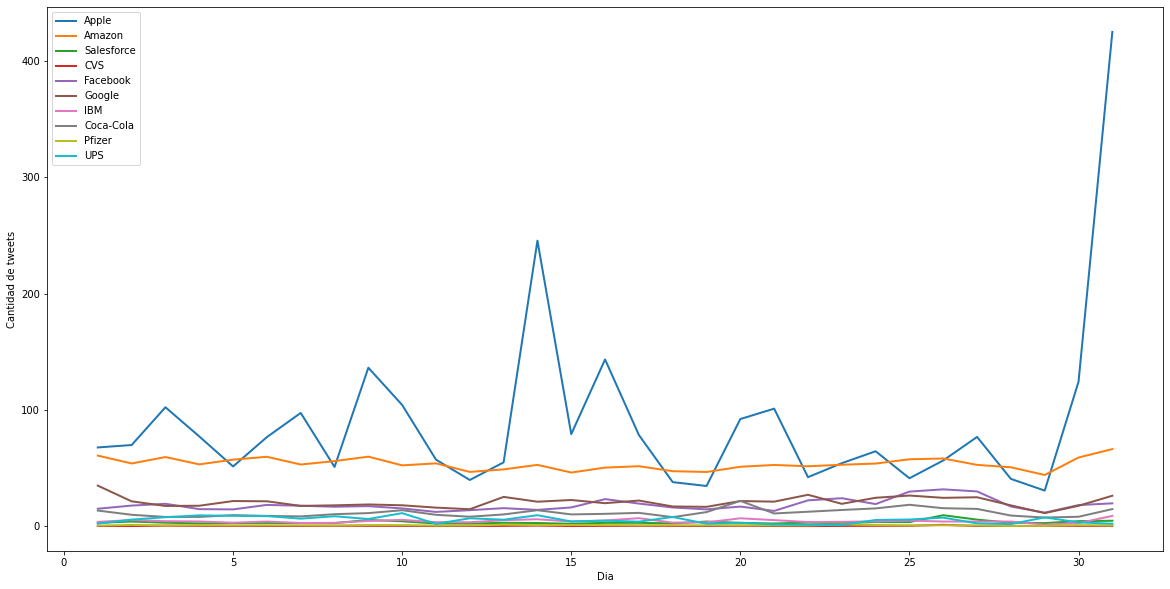

In [233]:
# Podemos ordenar segun dia, luego sacar el promedio
daysum = twitter.groupby(by=twitter.index.day).mean()
daysum.plot(figsize=(20, 10), linewidth=2, xlabel='Dia', ylabel='Cantidad de tweets')

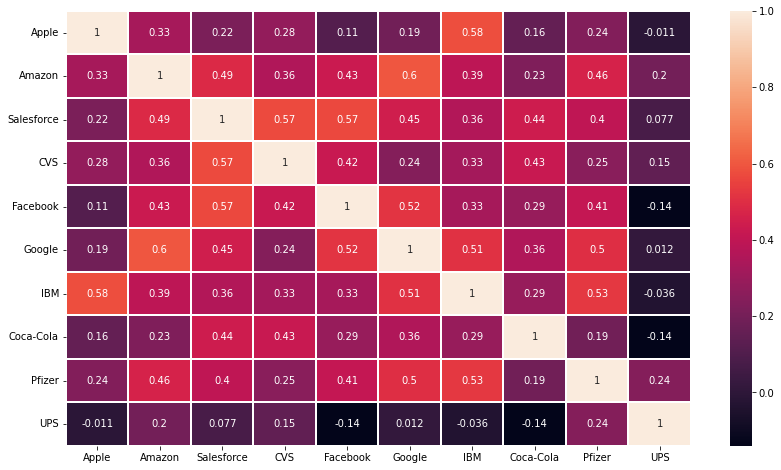

In [189]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(daysum.corr(), annot=True, linewidths=0.05, ax=ax)
plt.show()

<AxesSubplot:xlabel='Google', ylabel='Amazon'>

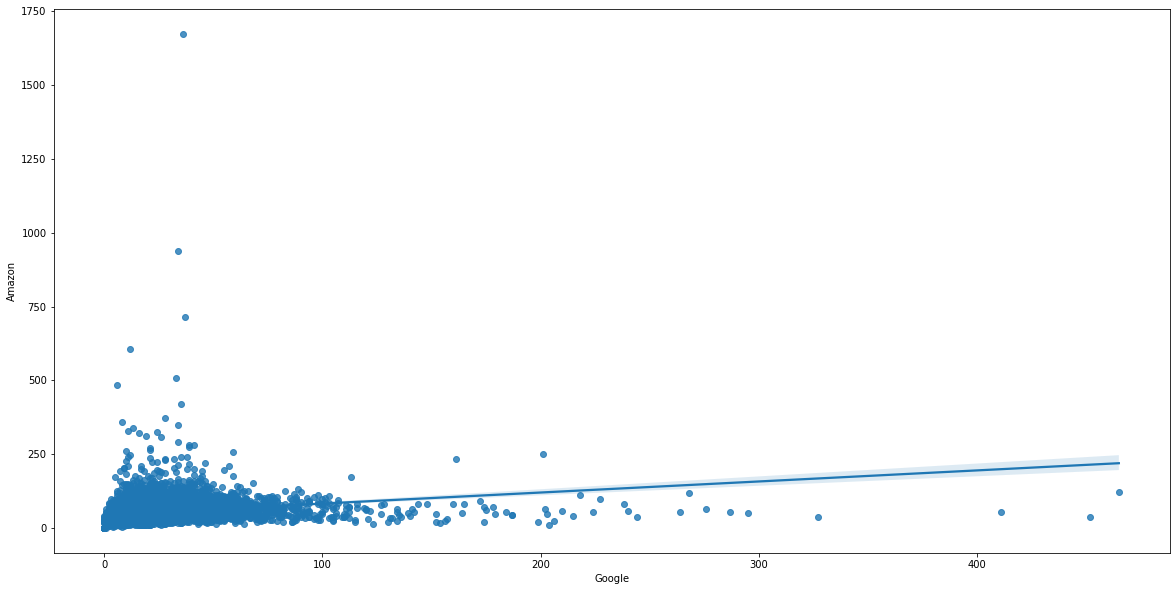

In [191]:
fig, ax = plt.subplots(figsize=(20, 10), linewidth=2)
sns.regplot(x=twitter["Google"], y=twitter["Amazon"], ax=ax)

<AxesSubplot:xlabel='Google', ylabel='Facebook'>

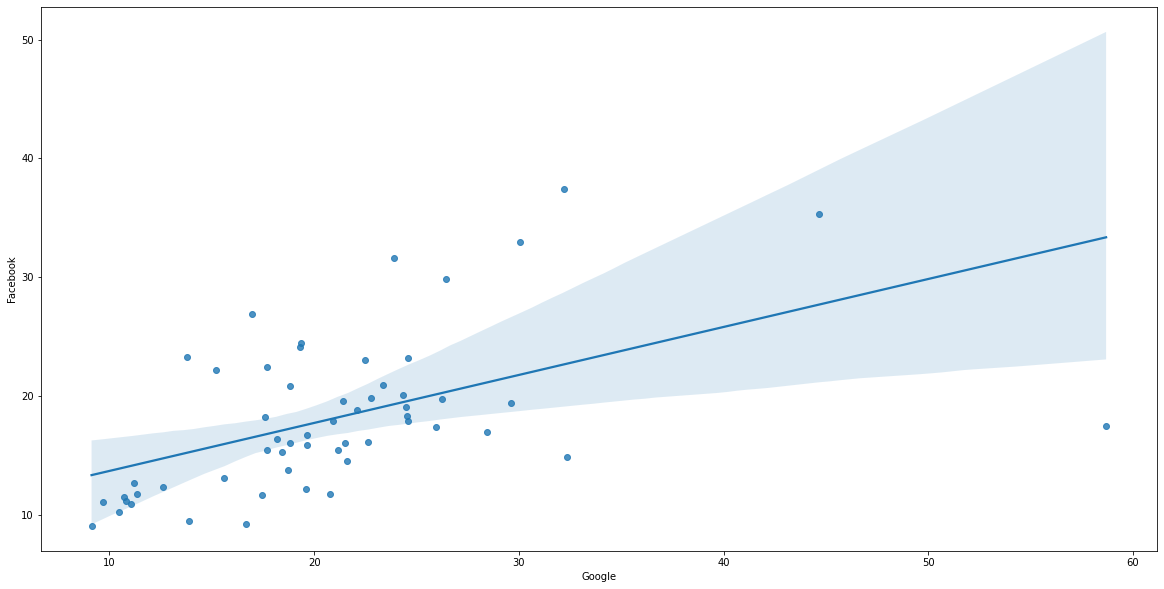

In [192]:
fig, ax = plt.subplots(figsize=(20, 10), linewidth=2)
sns.regplot(x=daysum["Google"], y=daysum["Facebook"], ax=ax)

# Si bien tenemos algo de correlacion, la relacion entre estas dos variables no es lineal

<AxesSubplot:xlabel='Apple', ylabel='UPS'>

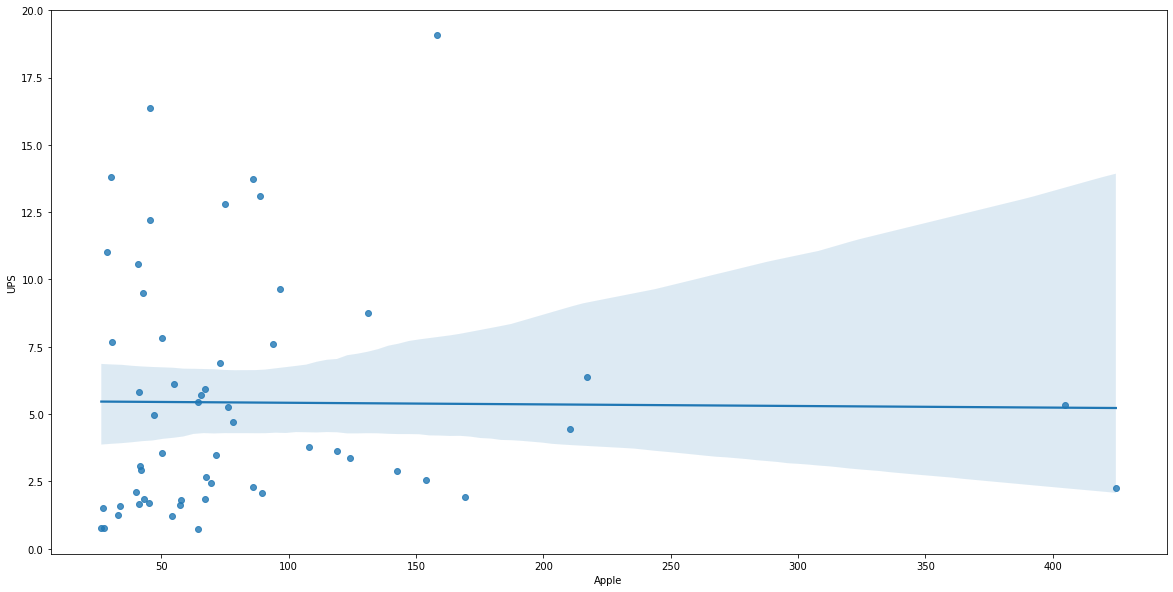

In [193]:
fig, ax = plt.subplots(figsize=(20, 10), linewidth=2)
sns.regplot(x=daysum["Apple"], y=daysum["UPS"], ax=ax)

<ipython-input-195-819dc614ae23>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  daysum.hist(ax=ax)


array([[<AxesSubplot:title={'center':'Apple'}>,
        <AxesSubplot:title={'center':'Amazon'}>,
        <AxesSubplot:title={'center':'Salesforce'}>],
       [<AxesSubplot:title={'center':'CVS'}>,
        <AxesSubplot:title={'center':'Facebook'}>,
        <AxesSubplot:title={'center':'Google'}>],
       [<AxesSubplot:title={'center':'IBM'}>,
        <AxesSubplot:title={'center':'Coca-Cola'}>,
        <AxesSubplot:title={'center':'Pfizer'}>],
       [<AxesSubplot:title={'center':'UPS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

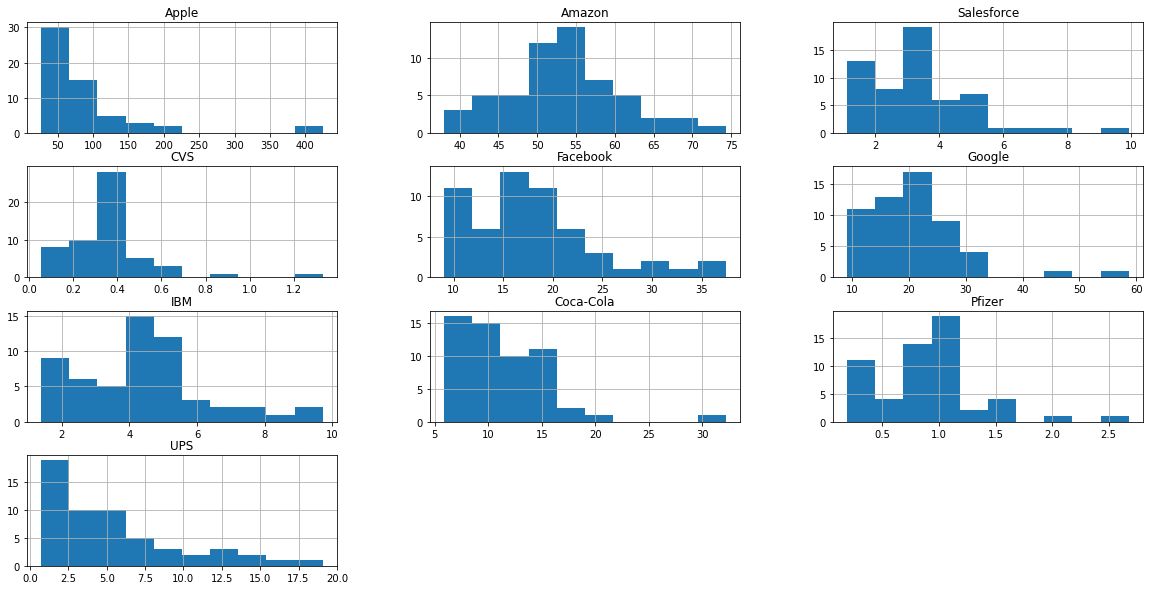

In [195]:
fig, ax = plt.subplots(figsize=(20, 10), linewidth=2)
daysum.hist(ax=ax)

In [202]:
# Podemos usar datasets de prueba de seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# Seaborn

In [3]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Que nos interesa en este dataset? el precio de los diamantes

## Histplot

<AxesSubplot:xlabel='price', ylabel='Count'>

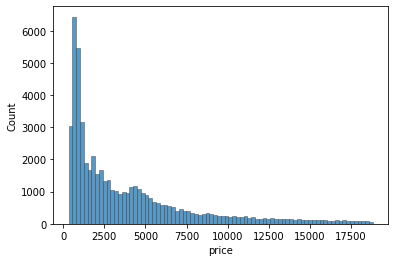

In [206]:
sns.histplot(
    diamonds,
    x="price",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

In [4]:
bycut = diamonds.groupby(by=['cut']).mean()
bycut.head()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770


## Relplot

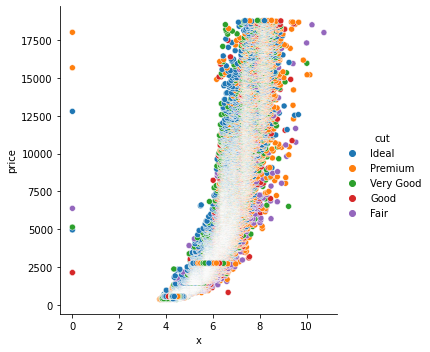

In [15]:
sns.relplot(x=diamonds['x'], y=diamonds['price'], hue='cut', data=diamonds)

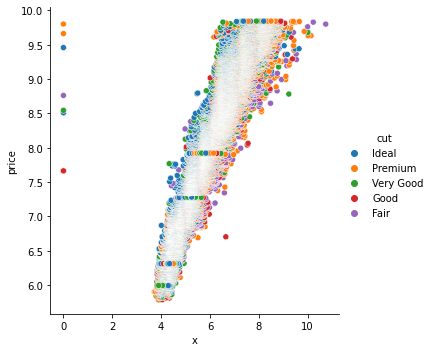

In [16]:
sns.relplot(x=diamonds['x'], y=np.log(diamonds['price']), hue='cut', data=diamonds)

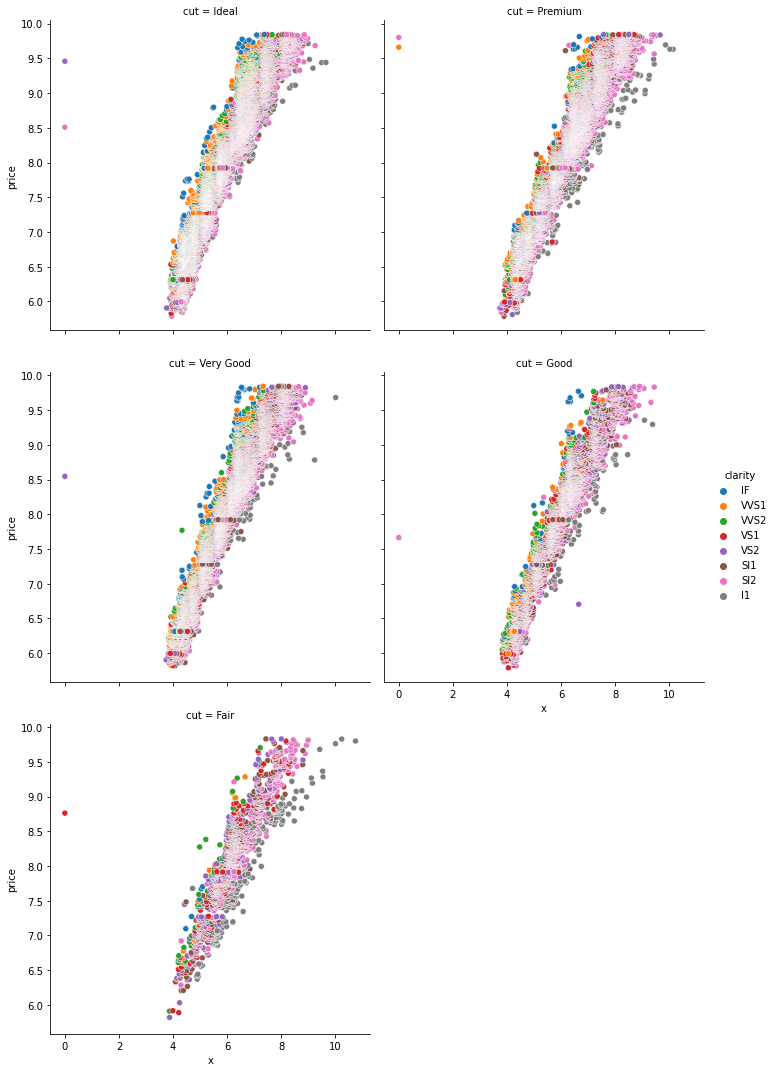

In [19]:
# Relplot nos permite separar segun categoria 'col'
sns.relplot(x=diamonds['x'], y=np.log(diamonds['price']), col='cut', hue='clarity', data=diamonds, col_wrap=2)

## Boxplot

<AxesSubplot:xlabel='price'>

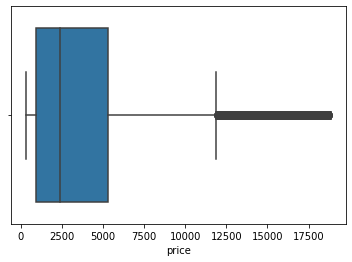

In [14]:
# boxplot nos entrega cuartiles
# tambien podemos ver valores atipicos
sns.boxplot(x=diamonds['price'])

In [23]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='price', ylabel='cut'>

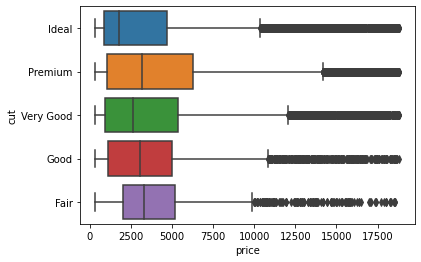

In [24]:
# Tambien podemos separar segun categoria
# Podemos ver que hay valores atipicos en todas las calidades de los diamantes
sns.boxplot(x=diamonds['price'], y=diamonds['cut'])

# Ejercicio

Realice el mismo procedimiento (analisis numerico y grafico para el siguiente dataset)
'height_weight_data.csv'
- Plantee alguna pregunta respecto al dataset
- Explore correlaciones
- Grafique variables contra otras variables
- Haga boxplot, histogramas, etc

In [75]:
# Cargamos datos
world = pd.read_csv('Files/height_weight_data.csv')

# Podemos plantearnos, por ej:
# - Como se relacionan las variables (scatterplots, regplots)?
# - Hay alguna relacion entre los bmi de 'female' y 'male'? 
# - Que paises tienen en promedio, sobrepeso? y obesidad? con bmi bajo normal?
# Considere los rangos siguientes:
bmis = {'[0, 18.5]': 'bajo normal',
         '[18.5, 25]' : 'normal',
         '[25, 30]' : 'sobrepeso',
         '[30, 100]' : 'obesidad'}
world.head()

,country,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
0,Netherlands,184,170,87.9,73.2,26.1,25.3
1,Montenegro,183,170,90.4,75.3,27.0,26.2
2,Estonia,182,168,89.9,73.7,27.0,26.0
3,Denmark,182,169,86.8,70.2,26.3,24.6
4,Bosnia and Herzegovina,182,167,87.1,70.6,26.4,25.3


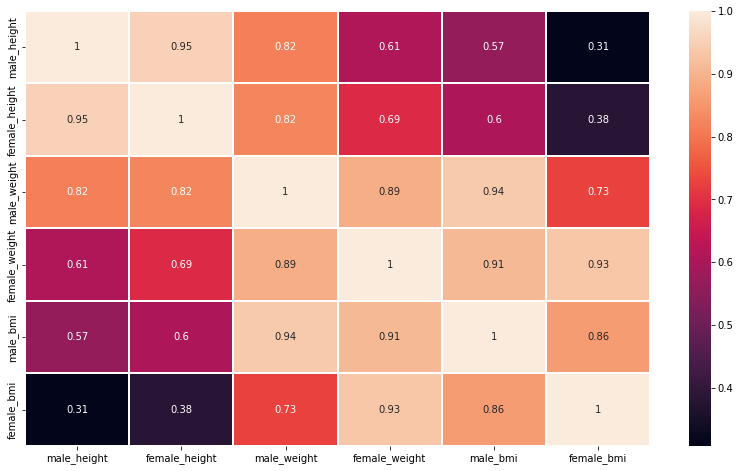

In [11]:
# Correlaciones
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(world.corr(), annot=True, linewidths=0.05, ax=ax)
plt.show()

Ejercicio propuesto: haga un analisis numerico del dataset

## Scatterplot

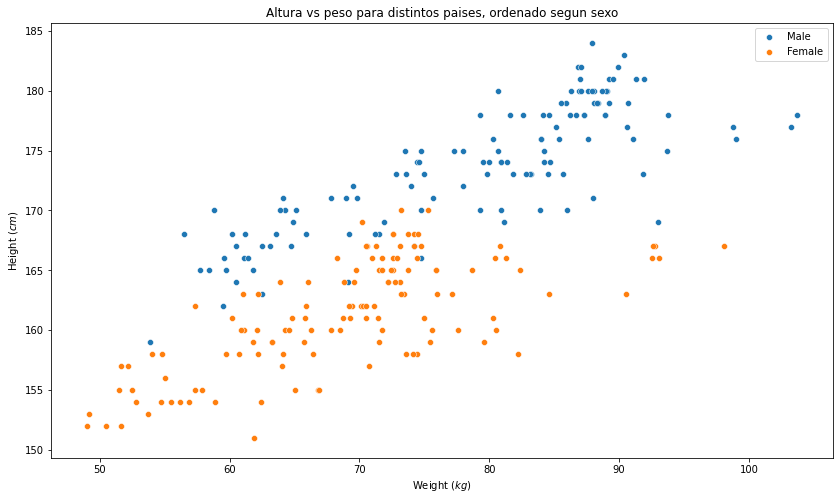

In [70]:
# Podemos querer visualizar el peso contra la altura, diferenciando por sexo
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.scatterplot(x='male_weight', y='male_height', data=world, ax=ax, label='Male')
sns.scatterplot(x='female_weight', y='female_height', data=world, ax=ax, label='Female')
ax.set_xlabel('Weight ($kg$)')
ax.set_ylabel('Height ($cm$)')
ax.set_title('Altura vs peso para distintos paises, ordenado segun sexo')
ax.legend()

In [81]:
# Podemos agregar una nueva columna: categoria de bmi
import json
def bmi_classification(bmi):
    for range_str, category in bmis.items():
        range = json.loads(range_str)
        if range[0] <= bmi < range[1]:
            return category
    return 'Categoria no encontrada'

world['male category'] = world['male_bmi'].apply(bmi_classification)
world['female category'] = world['female_bmi'].apply(bmi_classification)

In [83]:
world.head()

,country,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi,male category,female category
0,Netherlands,184,170,87.9,73.2,26.1,25.3,sobrepeso,sobrepeso
1,Montenegro,183,170,90.4,75.3,27.0,26.2,sobrepeso,sobrepeso
2,Estonia,182,168,89.9,73.7,27.0,26.0,sobrepeso,sobrepeso
3,Denmark,182,169,86.8,70.2,26.3,24.6,sobrepeso,normal
4,Bosnia and Herzegovina,182,167,87.1,70.6,26.4,25.3,sobrepeso,sobrepeso


In [79]:
world['male category'].value_counts()

sobrepeso    80
normal       38
obesidad      8
Name: male category, dtype: int64

In [84]:
world['female category'].value_counts()

sobrepeso    77
normal       36
obesidad     13
Name: female category, dtype: int64

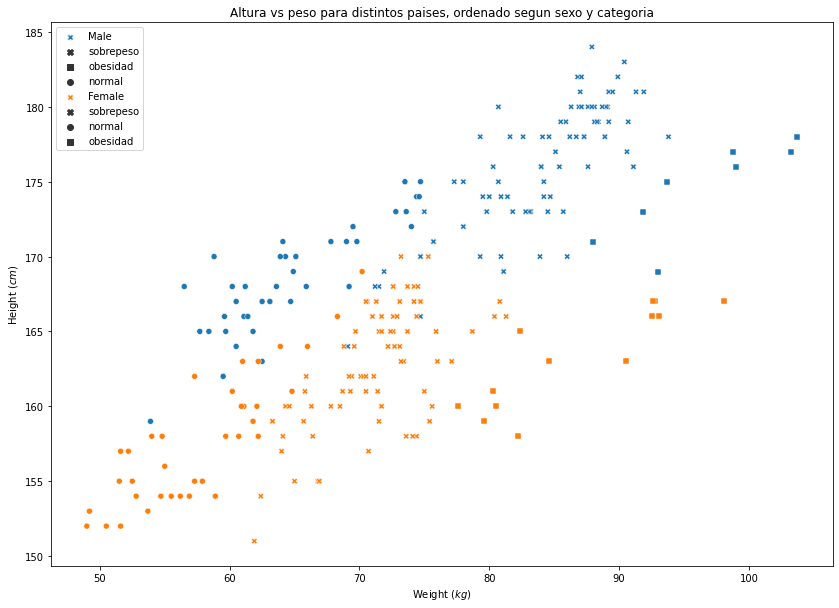

In [105]:
# Podemos querer visualizar el peso contra la altura, diferenciando por sexo y categoria
markers = {'normal': 'o', 'sobrepeso': 'X', 'obesidad': 's'}
fig,  ax = plt.subplots(1, 1, figsize=(14, 10))
sns.scatterplot(x='male_weight', y='male_height', data=world, ax=ax, label='Male', 
                style='male category', markers=markers)
sns.scatterplot(x='female_weight', y='female_height', data=world, ax=ax, label='Female', 
                style='female category', markers=markers)
ax.set_xlabel('Weight ($kg$)')
ax.set_ylabel('Height ($cm$)')
ax.set_title('Altura vs peso para distintos paises, ordenado segun sexo y categoria')
ax.legend()

Recordar que
$$ BMI = \frac{weight}{height^2}$$
Luego:
$$ height = +\sqrt{\frac{weight}{BMI}}

In [132]:
weight = np.linspace(0,100,100)
heights25 = 100*np.sqrt(weight/25)
heights30 = 100*np.sqrt(weight/30)
heights185 = 100*np.sqrt(weight/18.5)

(40.0, 108.885, 145.0, 190.0)

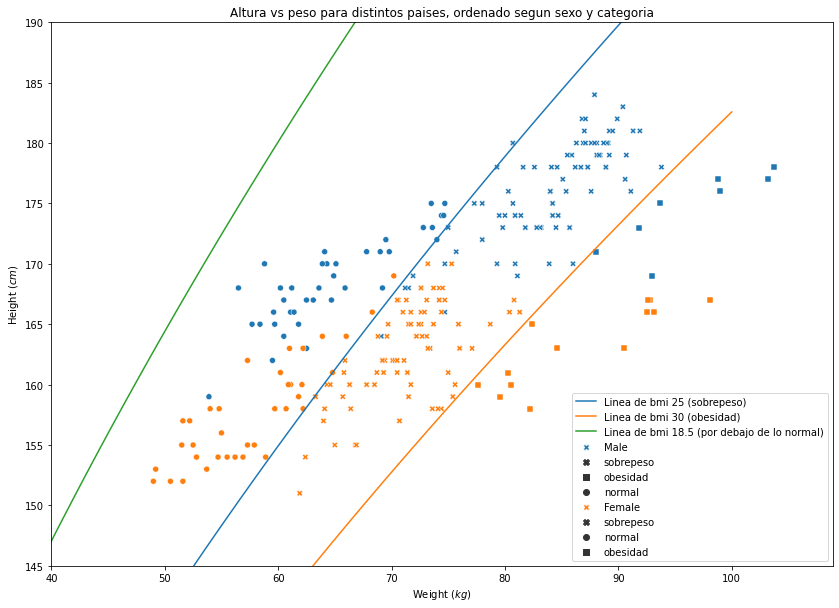

In [139]:
# tambien podemos usar lineplot para definir los limites entre categorias
markers = {'normal': 'o', 'sobrepeso': 'X', 'obesidad': 's'}
fig,  ax = plt.subplots(1, 1, figsize=(14, 10))
sns.scatterplot(x='male_weight', y='male_height', data=world, ax=ax, label='Male', 
                style='male category', markers=markers)
sns.scatterplot(x='female_weight', y='female_height', data=world, ax=ax, label='Female', 
                style='female category', markers=markers)
sns.lineplot(x=weight, y=heights25, label='Linea de bmi 25 (sobrepeso)')
sns.lineplot(x=weight, y=heights30, label='Linea de bmi 30 (obesidad)')
sns.lineplot(x=weight, y=heights185, label='Linea de bmi 18.5 (por debajo de lo normal)')
ax.set_xlabel('Weight ($kg$)')
ax.set_ylabel('Height ($cm$)')
ax.set_title('Altura vs peso para distintos paises, ordenado segun sexo y categoria')
ax.legend()
#ax.ylim([145, 190])
ax.axis(xmin=40, ymin=145,ymax=190)

## Histplot/displot

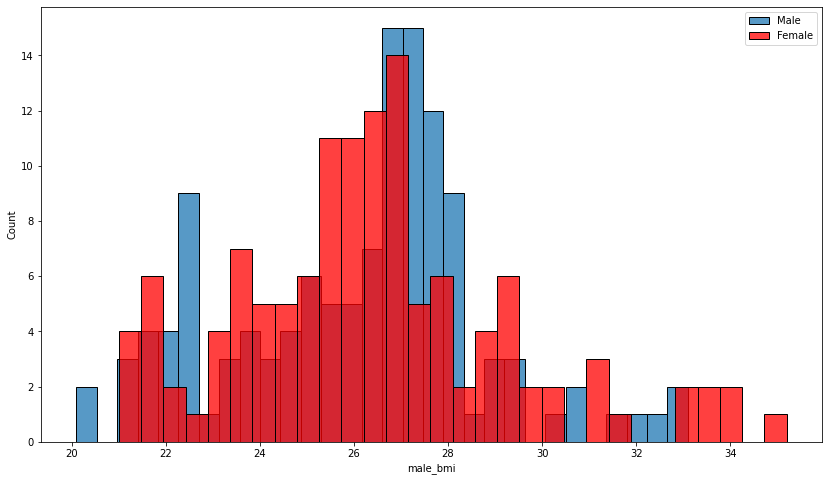

In [184]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.histplot(x='male_bmi', data=world, ax=ax, bins=30, multiple="dodge", label='Male')
sns.histplot(x='female_bmi', data=world, ax=ax, bins=30, color='r', multiple="dodge", label='Female')
ax.legend()

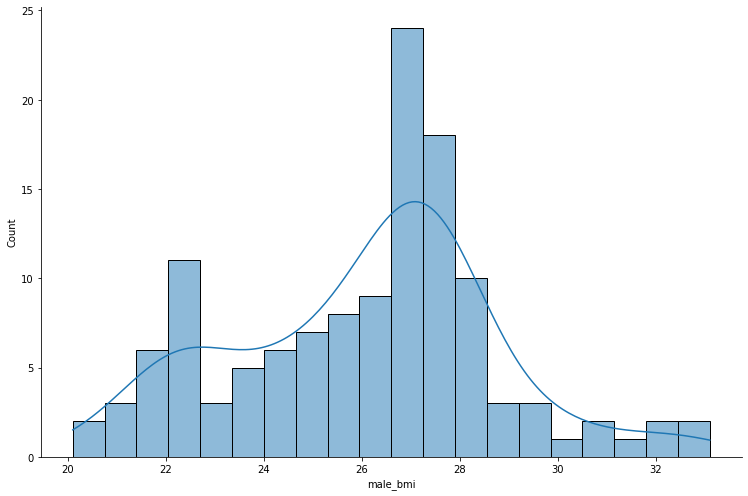

In [201]:
#disTplot esta deprecated, usar displot mejor
sns.displot(x='male_bmi', data=world, kde=True, bins=20, height=7, aspect=1.5)

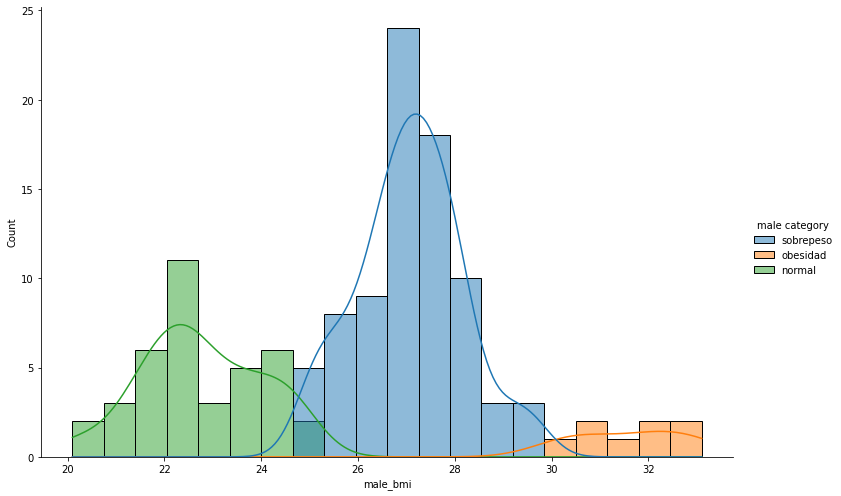

In [202]:
# Podemos descomponer segun category
sns.displot(x='male_bmi', data=world, kde=True, bins=20, hue='male category', height=7, aspect=1.5)

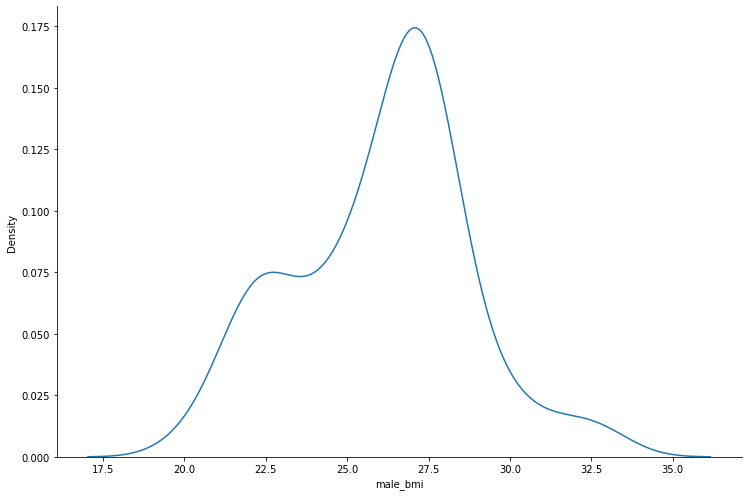

In [203]:
sns.displot(x='male_bmi', data=world, kind="kde", height=7, aspect=1.5)

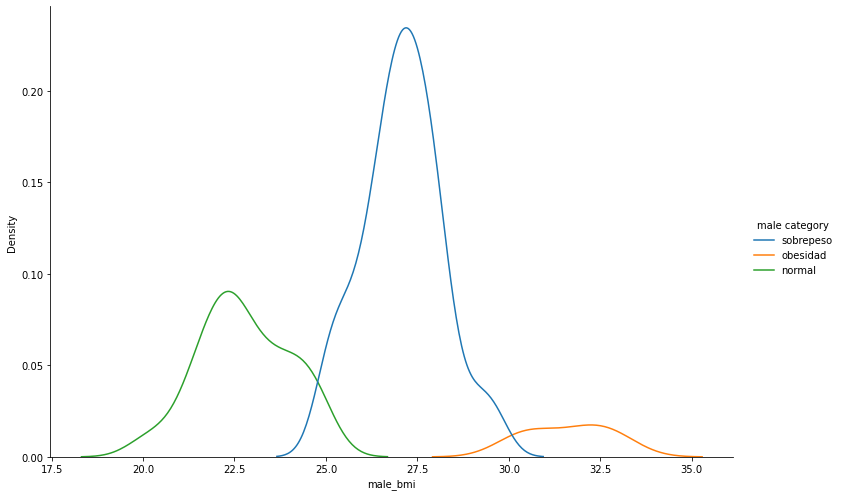

In [204]:
# Podemos descomponer segun category
sns.displot(x='male_bmi', data=world, kind="kde", hue='male category', height=7, aspect=1.5)

## Boxplot

<AxesSubplot:xlabel='variable', ylabel='value'>

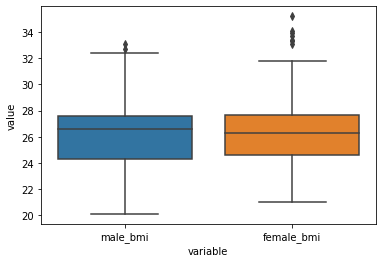

In [246]:
meltt = pd.melt(world[['male_bmi', 'female_bmi']])
sns.boxplot(x="variable", y="value", data=meltt)

<AxesSubplot:>

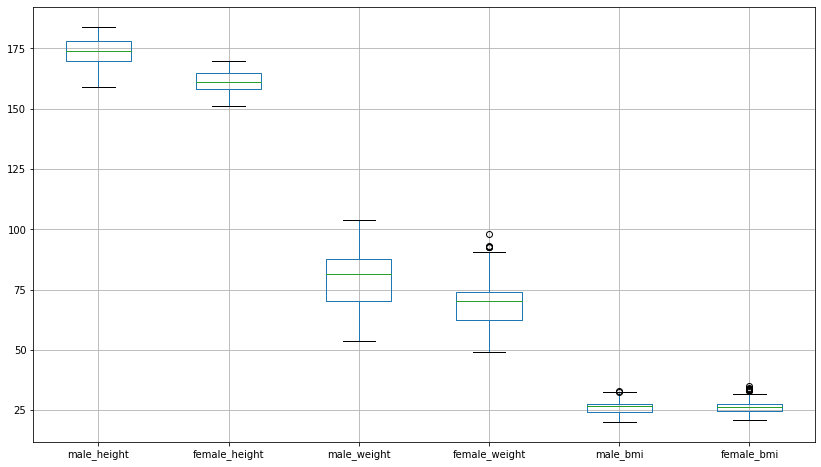

In [262]:
# Tambien podemos usar boxplot de pandas
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
world.boxplot(ax=ax)

<AxesSubplot:>

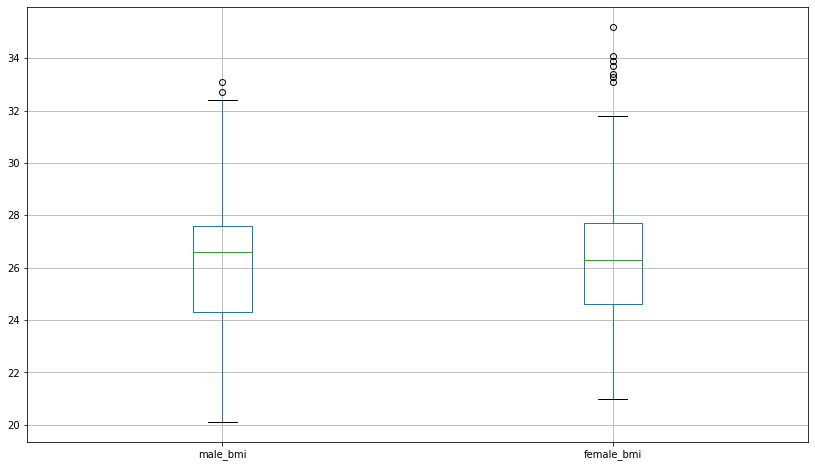

In [273]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
world.boxplot(ax=ax, column=["male_bmi", "female_bmi"])

<AxesSubplot:xlabel='female category', ylabel='female_bmi'>

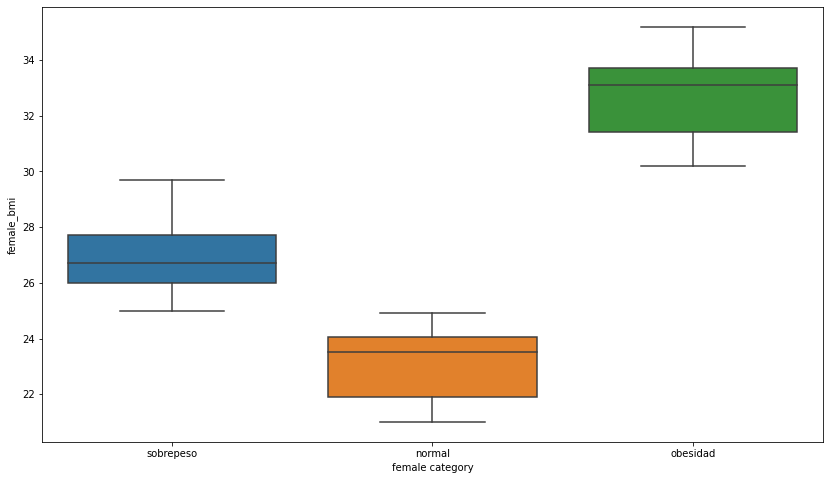

In [274]:
fig,  ax = plt.subplots(1, 1, figsize=(14, 8))
sns.boxplot(y='female_bmi', x='female category', data=world, ax=ax)

Ejercicio Propuesto: agrupe datos segun continentes y haga el mismo analisis. Hint: la libreria 'pycountry_convert' podria ser util.